# Focus stacking with image bunches¶

Example of focus stacking with:

* detection of noisy pixel map
* masking of noisy pixels
* automatic alignment
* luminosity balance
* focus stacking

In [2]:
import sys
sys.path.append('../')
from config.constants import constants
from focus_stack import *

In [3]:
job = StackJob("job", "../tests")
job.add_action(NoiseDetection("noise-map", input_path=["input/img-tif"],
                              channel_thresholds=(160, 160, 160), plot_range=(150, 180)))
job.run()

[INF] noise-map: map noisy pixels from frames in folder: input/img-tif                              


noise-map:   0%|          | 0/6 [00:00<?, ?it/s]

[INF] noise-map: hot pixels: rgb: 55, r: 21, g: 11, b: 23                              
[INF] noise-map: writing hot pixels map file: noise-map/hot_pixels.png                              
[INF] noise-map: elapsed time: 00:00:00.28s                              
[INF] noise-map: completed                              
[INF] job: elapsed time: 00:00:00.28s                              
[INF] job: completed                              


In [4]:
job = StackJob("job", "../tests", input_path="input/img-tif")
job.add_action(CombinedActions("align",
                           [MaskNoise(), AlignFrames(),
                            BalanceFrames(channel=constants.BALANCE_RGB, corr_map=constants.BALANCE_MATCH_HIST)]))
job.add_action(FocusStack("stack", PyramidStack(), output_path="output/test-ex2-stack",
               postfix='_pyramid'))
job.add_action(MultiLayer("multilayer", input_path=['input/img-tif', 'output/test-ex2-stack'],
                         output_path="output/test-ex2-multilayer"))
job.run()

[INF] align: begin run                              
[INF] align: : 6 files in folder: input/img-tif                              
[INF] align: focus stacking                              
[INF] align:                                                                                                    
[INF] align: elapsed time: 00:00:07.51s                              
[INF] align: completed                              
[INF] stack: : 6 files in folder: align                              
[INF] stack: focus stacking                              
[INF] stack: elapsed time: 00:00:01.39s                                                  
[INF] stack: completed                              
[INF] multilayer: merging frames in folders: input/img-tif, output/test-ex2-stack                              
[INF] multilayer: frames: 0001.tif, 0000.tif, 0002.tif, 0003.tif, 0004.tif, 0005.tif, 0000_pyramid.tif                              
[INF] multilayer: reading files                            

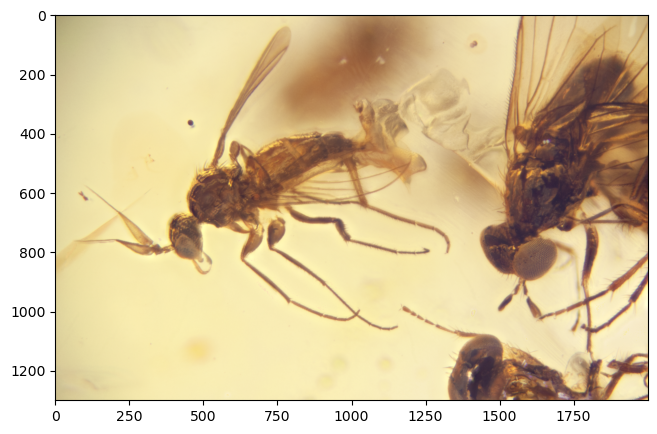

In [5]:
from focus_stack.utils import img_8bit, read_img
import matplotlib.pyplot as plt
import cv2

img = cv2.cvtColor(img_8bit(read_img("../tests/output/test-ex2-stack/0000_pyramid.tif")), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))
plt.imshow(img, 'gray')
plt.show()